In [1]:
#!pip install powerlaw
import pandas as pd
import glob
import numpy as np
import pickle
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import powerlaw
import math
import operator

In [5]:
#Read SNet
input_path = "models/SNetLargestComponent.gml"
G = nx.read_gml(input_path)

n = G.number_of_nodes()
m = G.number_of_edges()
print(n, m)

3524 156934


In [6]:
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
weight_list = []
for w in weights:
    weight_list.append(w)

print(len(weight_list))

156934


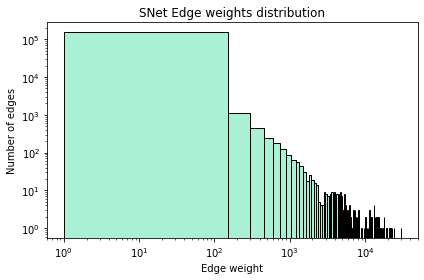

In [7]:
plt.hist(weight_list, color = '#aaf0d4', edgecolor = 'black', bins=200)

plt.title('SNet Edge weights distribution')
plt.xlabel('Edge weight')
plt.ylabel('Number of edges')
plt.xscale("log")   
plt.yscale("log")

plt.tight_layout()
plt.show()


In [8]:
#Filter SNet and create SNetF

edge_weights = nx.get_edge_attributes(G,'weight')
max_edge = G.number_of_edges() * 0.09
print("Max edges: ", int(max_edge))
edge_weights_items = sorted(edge_weights.items(), key=operator.itemgetter(1), reverse=True)[int(max_edge):int(max_edge)+1]
edge_weight_limit = edge_weights_items[0][1]
print("Edge weight limit : ", edge_weight_limit)

n = G.number_of_nodes()
m = G.number_of_edges()
G.remove_edges_from((e for e, w in edge_weights.items() if w < edge_weight_limit))

nodesToRemove = list(nx.isolates(G))
G.remove_nodes_from(nodesToRemove)
print("Is new graph connected? ", nx.is_connected(G))

n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes after filtering : ", n)
print("Number of edges after filtering : ", m)

Max edges:  14124
Edge weight limit :  15
Is new graph connected?  False
Number of nodes after filtering :  409
Number of edges after filtering :  14309


In [9]:
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
weight_list = []
for w in weights:
    weight_list.append(w)

print(len(weight_list))

14309


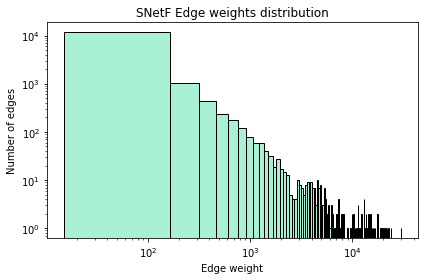

In [10]:
plt.hist(weight_list, color = '#aaf0d4', edgecolor = 'black', bins=200)

plt.title('SNetF Edge weights distribution')
plt.xlabel('Edge weight')
plt.ylabel('Number of edges')
plt.xscale("log")   
plt.yscale("log")

plt.tight_layout()
plt.show()


In [61]:
#Find components and extract largest component

[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
largest_component = S[0]
print("Number of components : ", len(S))
print("Number of nodes in largest component : ", largest_component.number_of_nodes())
G = largest_component


Number of components :  2
Number of nodes in largest component :  407


In [81]:
output_path = "models/SNetF.gml"

nx.write_gml(G, output_path)

In [4]:
G = nx.read_gml("models/SNetF.gml")

In [97]:
#1.7 Network density

number_of_edges = G.number_of_edges()
number_of_nodes = G.number_of_nodes()
absolut_number_of_edges = number_of_nodes * (number_of_nodes - 1)/2
network_density = number_of_edges/absolut_number_of_edges

print("Network density : ", network_density)

Network density :  0.17317631110734558


In [47]:
#1.8 Diameter and Average shortest path

diameter = nx.diameter(G)
print("SNetF diameter: ", diameter)

average_shortest_path_length = nx.average_shortest_path_length(G, weight='weight') 
print("Average shortest path length with weight: ", average_shortest_path_length)
average_shortest_path_length = nx.average_shortest_path_length(G) 
print("Average shortest path length without weight: ", average_shortest_path_length)

SNetF diameter:  4
Average shortest path length:  47.584524515558996
Average shortest path length:  1.8547947858292686


In [48]:
#1.10 ER Model
n = G.number_of_nodes()
m = G.number_of_edges()
print("\nNumber of nodes : ", n)
print("Number of edges : ", m)

p = ( 2*float(m) ) / ( n* (n-1) )
er_net = nx.erdos_renyi_graph(n,p)

delta_m = m - er_net.number_of_edges()


Number of nodes :  407
Number of edges :  14308
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi -22, što je odstupanje od 0.15376013419066256%


Average clustering coefficient :  0.844832614459805
Global clustering coefficient :  0.5117015268125766


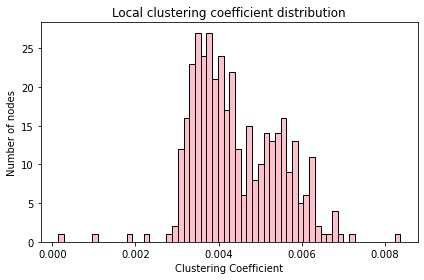

In [51]:
#1.10 Average and global clustering coefficient, Local clustering coefficient distribution for SNetF

average_clustering_coefficient = nx.average_clustering(G)
global_clustering_coefficient = nx.transitivity(G)

subreddit, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())
local_clustering_data = [(subreddit, cc)  for subreddit, cc in zip(subreddit, clustering_coef) if cc > 0]
local_clustering_coefficients = pd.DataFrame(local_clustering_data, columns = ["subreddit", "cc"])
local_clustering_coefficients.sort_values('cc', inplace = True, ascending=False)

print("Average clustering coefficient : ", average_clustering_coefficient)
print("Global clustering coefficient : ", global_clustering_coefficient)

plt.hist(local_clustering_coefficients['cc'], color = 'pink', edgecolor = 'black',
         bins = int(300/5))

plt.title('Local clustering coefficient distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.tight_layout()
plt.show()


Average clustering coefficient :  0.1732855938931511
Global clustering coefficient :  0.17320768221400454


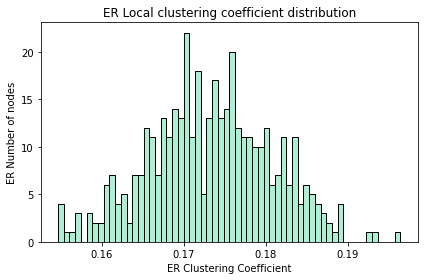

In [55]:
#1.10 Average and global clustering coefficient, Local clustering coefficient distribution for ER Net

average_clustering_coefficient_er = nx.average_clustering(er_net)
global_clustering_coefficient_er = nx.transitivity(er_net)


subreddit_er, clustering_coef_er = zip(*nx.clustering(er_net, weight = "weight").items())
local_clustering_data_er = [(subreddit, cc)  for subreddit, cc in zip(subreddit_er, clustering_coef_er) if cc > 0]
local_clustering_coefficients_er = pd.DataFrame(local_clustering_data_er, columns = ["subreddit", "cc"])
local_clustering_coefficients_er.sort_values('cc', inplace = True, ascending=False)

print("Average clustering coefficient : ", average_clustering_coefficient_er)
print("Global clustering coefficient : ", global_clustering_coefficient_er)

plt.hist(local_clustering_coefficients_er['cc'], color = '#aaf0d4', edgecolor = 'black',
         bins = int(300/5))

plt.title('ER Local clustering coefficient distribution')
plt.xlabel('ER Clustering Coefficient')
plt.ylabel('ER Number of nodes')
plt.tight_layout()
plt.show()

In [11]:
#1.12
# unweighted assortativity 
r1 = nx.degree_assortativity_coefficient(G)
print(f"Assortativity coeficient for unweighted graph: {r1}")

# weighted assortativity 
#r2 = nx.degree_assortativity_coefficient(G, weight='weight') 

Assortativity coeficient for unweighted graph: -0.6173061217570568


In [66]:
# 1.14

def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    #print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

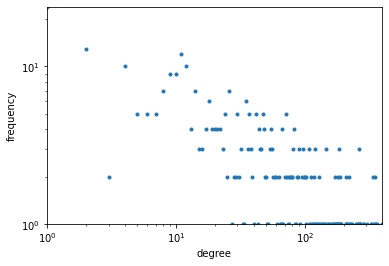

In [67]:
plot_deg_frequency(G)

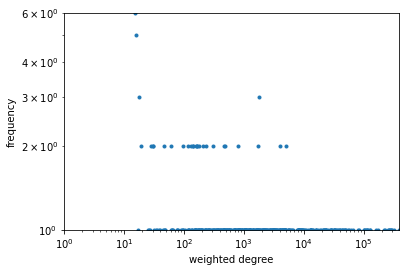

In [68]:
plot_deg_frequency(G, weighted = True)

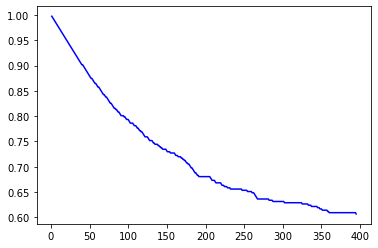

In [69]:
# Power law distribution

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

max_deg = max(deg) 

# calculating histogram
values, base = np.histogram(deg, bins = max_deg)

# cumulative sum
cumulative = np.cumsum(values)

# Ploting complementary cumulative degree distribution P(X>x)
plt.plot(base[:-1], [float(x)/len(G) for x in len(G) - cumulative], c='blue')

plt.show()

In [71]:
results = powerlaw.Fit(degree_sequence)
print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'lognormal')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")


Calculating best minimal value for power law fit
{'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_exponential': <class 'powerlaw.Stretched_Exponential'>, 'lognormal_positive': <class 'powerlaw.Lognormal_Positive'>}
3.816505871248869
161.0
0.3636093444614093
Loglikelihood ratio: -3.9887792528838135
Statistical significance: 0.05939685735201332
Loglikelihood ratio: -3.767696620064015
Statistical significance: 0.0044293972449380575


Assuming nested distributions


Loglikelihood ratio: -3.227829088124258
Statistical significance: 0.01105995674100091


In [79]:
#1.15 Hubs and authorities
hubs, authorities =nx.hits(G)

In [80]:
hub_items = sorted(hubs.items(), key=operator.itemgetter(1), reverse=True)[:10]
print("SNetF Hubs\n")
for hub_item in hub_items:
    print(hub_item)

authority_items = sorted(authorities.items(), key=operator.itemgetter(1), reverse=True)[:10]
print("\nSNetF Authorities\n")
for authority_item in authority_items:
    print(authority_item)


SNetF Hubs

('reddit.com', 0.064723451946371)
('politics', 0.05401219292311146)
('pics', 0.05041658121974547)
('funny', 0.04829390592333726)
('science', 0.04716763136754637)
('technology', 0.04559610929246317)
('worldnews', 0.044719284522342535)
('WTF', 0.044469730022398915)
('entertainment', 0.042680138053887776)
('programming', 0.03811898512797522)

SNetF Authorities

('reddit.com', 0.06472345194769699)
('politics', 0.05401219292250988)
('pics', 0.050416581219589036)
('funny', 0.04829390592322185)
('science', 0.04716763136747175)
('technology', 0.0455961092922672)
('worldnews', 0.04471928452228482)
('WTF', 0.04446973002235906)
('entertainment', 0.04268013805369183)
('programming', 0.03811898512787918)


In [12]:
#1.16 
#degree_centrality, closeness_centrality, betweenes_centrality

print("Top 10 Degree centrality:\n")
DC = nx.degree_centrality(G)
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for dc_item in dc_items:
    print(dc_item[0], "\t\t",dc_item[1], "\t",G.degree[dc_item[0]])
    
print("\nTop 10 Closeness centrality:\n")
CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for cc_item in cc_items:
    node = cc_item[0]
    print(cc_item[0], "   ", cc_item[1])

print("\nTop 10 Betweenness centrality:\n")
BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for bc_item in bc_items:
    node = bc_item[0];
    print(bc_item[0], "   ", bc_item[1])

Top 10 Degree centrality:

reddit.com 		 0.9705882352941176 	 396
politics 		 0.8848039215686274 	 361
technology 		 0.8799019607843137 	 359
pics 		 0.8627450980392157 	 352
science 		 0.8627450980392157 	 352
funny 		 0.8553921568627451 	 349
worldnews 		 0.8480392156862745 	 346
WTF 		 0.8284313725490196 	 338
entertainment 		 0.8284313725490196 	 338
programming 		 0.8186274509803921 	 334

Top 10 Closeness centrality:

reddit.com     0.9711774132730016
politics     0.8898894359505917
technology     0.8859864121087031
pics     0.8725913691610554
science     0.8725913691610554
funny     0.8669738281578726
worldnews     0.8614281533508925
entertainment     0.8469807210095778
WTF     0.8452087948149972
programming     0.8399372222901635

Top 10 Betweenness centrality:

reddit.com     0.18420260378904774
politics     0.0591065088400112
programming     0.057480014864259625
technology     0.04994408055993579
pics     0.041868262189999686
science     0.041394124951156575
worldnews     0.0

In [13]:
#1.17 Eigenvector centrality

print("\nTop 10 Eigenvector centrality:\n")
EC = nx.eigenvector_centrality(G)
ec_items = sorted(EC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for ec_item in ec_items:
    print(ec_item[0], "   ", ec_item[1])



Top 10 Eigenvector centrality:

reddit.com     0.10969615355063339
politics     0.10923268579898246
technology     0.10923026079830948
pics     0.10907660755326247
science     0.10907269918659585
funny     0.10896511728086855
worldnews     0.10874874407210977
WTF     0.10845387345347784
entertainment     0.10840879836202326
programming     0.10765092028953896


In [21]:
#1.18 Katz centrality

def calculate_beta(default_beta, reddit_beta):
    dict = {}
    i = 0
    for node in G.nodes():
        if node == 'reddit.com':
            dict[node] = reddit_beta
        else:
            dict[node] = default_beta
        i+=1
        
    return dict

In [5]:
lambda_max =  max(nx.adjacency_spectrum(G))
print(1/lambda_max)

(5.45209928685796e-06+0j)


In [27]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.04961216512365095+0j)
politics     (0.04960743662523867+0j)
technology     (0.049607166427633825+0j)
pics     (0.049606220724415805+0j)
science     (0.049606220724415805+0j)
funny     (0.04960581542009035+0j)
worldnews     (0.04960541010876744+0j)
WTF     (0.04960432929735567+0j)
entertainment     (0.04960432929588252+0j)
programming     (0.049603788849480863+0j)


In [9]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.13886973464219138+0j)
politics     (0.12256084136905142+0j)
pics     (0.1178990437505519+0j)
funny     (0.11480309869609918+0j)
science     (0.11340222655988468+0j)
technology     (0.1109690076463316+0j)
WTF     (0.10949867814576365+0j)
worldnews     (0.10948173320205698+0j)
entertainment     (0.10660793524412507+0j)
programming     (0.09979251743867079+0j)


In [24]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=calculate_beta(1,2), max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.18358613707552593+0j)
politics     (0.12667056781083053+0j)
pics     (0.12129433167056271+0j)
funny     (0.1179759372824658+0j)
science     (0.11644852684442145+0j)
technology     (0.11402403596001677+0j)
worldnews     (0.11233179169946092+0j)
WTF     (0.1122505256449196+0j)
entertainment     (0.10945035901363757+0j)
programming     (0.10216105947800935+0j)


In [25]:
KC = nx.katz_centrality(G, alpha=1/(2*lambda_max), beta=calculate_beta(1,4), max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
kc_items = sorted(KC.items(), key=operator.itemgetter(1), reverse=True)[:10]
for kc_item in kc_items:
    print(kc_item[0], "   ", kc_item[1])

reddit.com     (0.26732055986024944+0j)
politics     (0.13368394005476134+0j)
pics     (0.1269850534428837+0j)
funny     (0.12326505506227385+0j)
science     (0.1215069570890261+0j)
technology     (0.11911410023976948+0j)
worldnews     (0.11704332346352078+0j)
WTF     (0.11677615001372964+0j)
entertainment     (0.11416530673732282+0j)
programming     (0.10602184218295947+0j)


In [ ]:
#1.20 Spectral analisys - separate file

In [95]:
def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [98]:
#plot_and_save_dendrogram(G) - never finished

In [15]:
#1.23
bridges = list(nx.bridges(G))
potential_brokers = []
for bridge in bridges:
    potential_brokers.append(bridge[0])
    potential_brokers.append(bridge[1])
print('Potential brokers: ',set(potential_brokers))

Potential brokers:  {'functional', 'cheats', 'Chinese', 'it', 'france', 'spirituality', 'Clojure', 'C_Programming', 'arabic', 'weed', 'fr', 'Wordpress', 'nl', 'italy', 'security', 'politics', 'cimigo', 'tr', 'StarWars', 'inspirational', 'programming', 'promos', '7mooode', 'brasil', '5edwin', 'reddit.com', 'sv', 'GlobalistNews', 'dior_lei', 'InternetMarketing', 'yahoo', 'hacks'}


In [17]:
print('Most influential brokers based on betweenes centrality')
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:]
for bc_item in bc_items:
    if bc_item[0] in set(potential_brokers) and bc_item[1]>0:
        print(bc_item[0], "   ", bc_item[1])

Most influential brokers based on betweenes centrality
reddit.com     0.18420260378904774
politics     0.0591065088400112
programming     0.057480014864259625
Chinese     0.014597485185720481
it     0.004877872524931363
fr     0.004877872524931349
